In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [241]:
# Global definitions
base_folder = os.getcwd()
parent_folder = os.path.dirname(base_folder)
data_folder = os.path.join(parent_folder, "data")
path = data_folder + '/rare_species 1/'
df = pd.read_csv(data_folder + r'\rare_species 1\metadata.csv')
df.head()

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


In [242]:
# Image size definition
image_size = (224, 224) 
X = []
y = []

In [243]:
def load_and_resize_image(image_path, target_size=image_size):
    image = tf.io.read_file(path + '/' + image_path) # get the image 
    image = tf.image.decode_jpeg(image, channels=3) # decode that into an jped channels 3 means RGB 
    image = tf.image.resize(image, target_size) # resize- so sequential can accept it
    image = image / 255.0 # 0/1 format 
    return image

In [244]:
# Sample 
temp = df

In [245]:
for i in range (len(temp)):
    img = load_and_resize_image(temp['file_path'][i], target_size=image_size)
    X.append(img)
    y.append(temp['family'][i])

In [246]:
# Encode and split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train/val/test 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 7189
Validation set size: 2397
Test set size: 2397


In [247]:
#everything to np array
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)


In [248]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()

# First convolutional block 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # 224x224 RGB images
model.add(MaxPooling2D(pool_size=(2, 2)))

#Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Fivth convolutional block
#model.add(Conv2D(512, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization

model.add(Dense(256, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



c:\Users\Admin\anaconda\envs\ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [249]:
boynextdoor = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 169s 743ms/step - accuracy: 0.0316 - loss: 5.3723 - val_accuracy: 0.0864 - val_loss: 4.8569
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 165s 734ms/step - accuracy: 0.0822 - loss: 4.7672 - val_accuracy: 0.1047 - val_loss: 4.6424
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 167s 740ms/step - accuracy: 0.1333 - loss: 4.3288 - val_accuracy: 0.1252 - val_loss: 4.4982
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 166s 739ms/step - accuracy: 0.2281 - loss: 3.6685 - val_accuracy: 0.1502 - val_loss: 4.3814
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 165s 734ms/step - accuracy: 0.4117 - loss: 2.6373 - val_accuracy: 0.1585 - val_loss: 4.5889
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 165s 733ms/step - accuracy: 0.6072 - loss: 1.7026 - val_accuracy: 0.1606 - val_loss: 5.1872
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 165s 732ms/step - accuracy: 0.7591 - loss: 1.0078 - val_accuracy: 0.1615 - val_loss: 5.8672
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 165s 735ms/step - accuracy: 0.8356 -

In [250]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Test accuracy: {val_acc:.4f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.1551 - loss: 7.6849
Test accuracy: 0.1514


In [251]:
y_pred = model.predict(X_val)

75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step


In [252]:
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class index with the highest probability
y_pred_classes 


array([ 38, 126,  73, ...,  16,   2,  38], dtype=int64)

In [253]:
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_true_labels = label_encoder.inverse_transform(y_val)

Total incorrect predictions: 2397


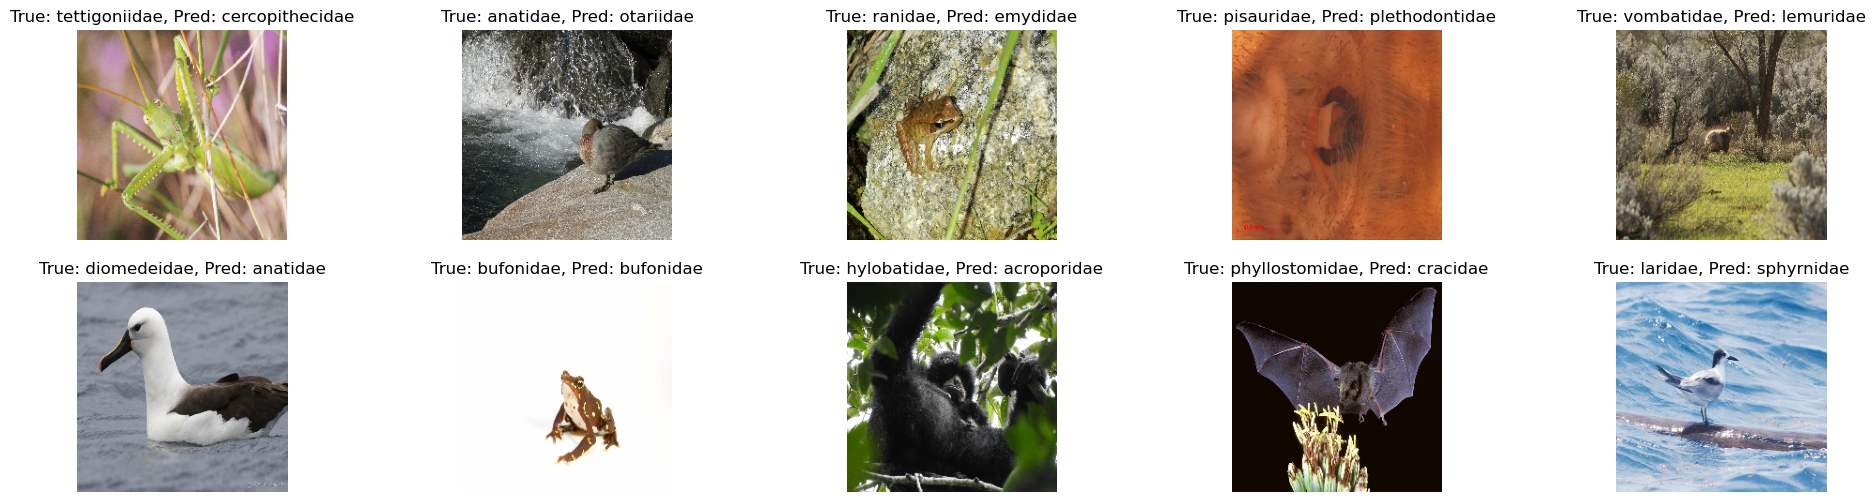

In [254]:
incorrect_indices = np.where(y_pred_labels != y_val)[0]
print(f"Total incorrect predictions: {len(incorrect_indices)}")

num_samples = min(10, len(incorrect_indices))  # Show up to 10 images
plt.figure(figsize=(24, 6))

for i, idx in enumerate(incorrect_indices[:num_samples]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val[idx])  # Display image
    plt.title(f"True: {y_true_labels[idx]}, Pred: {y_pred_labels[idx]}")
    plt.axis("off")

plt.show()


In [255]:
# To see correct predictions
correct_indices = np.where(y_pred_classes == y_val)[0]  
print(f"Total correct predictions: {len(correct_indices)}")


Total correct predictions: 363


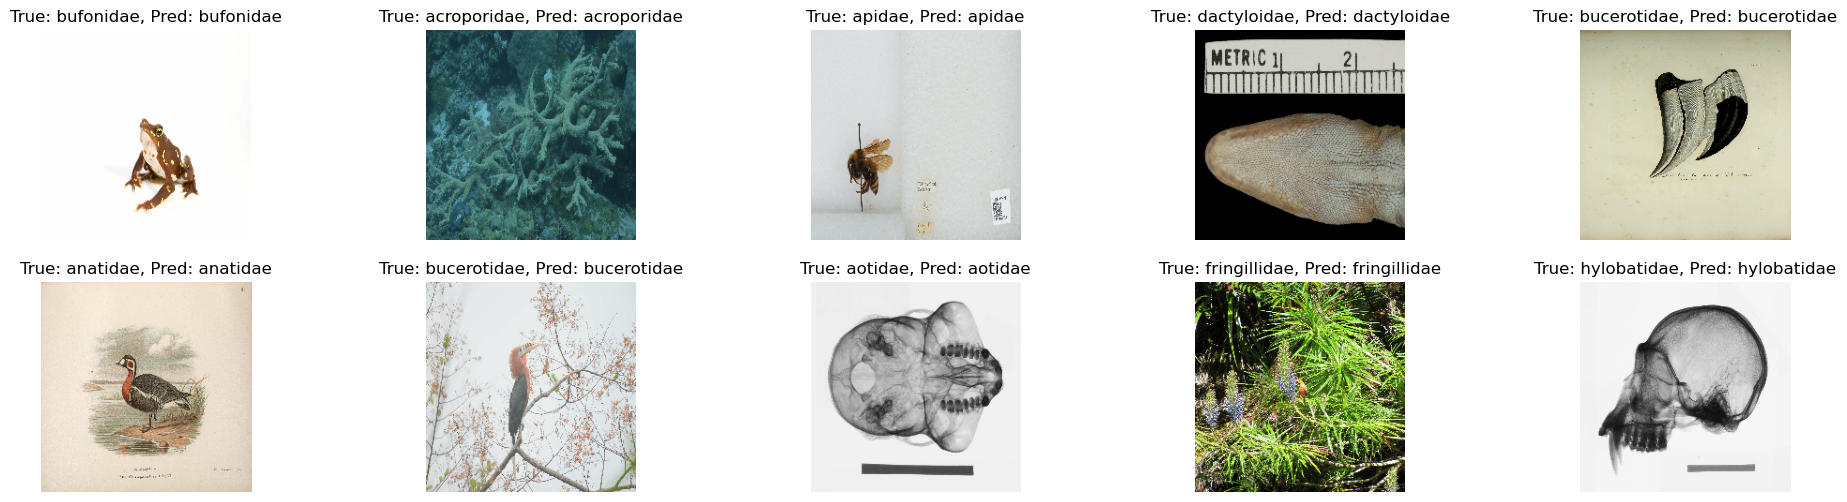

In [256]:
num_samples = min(10, len(correct_indices))  # Show up to 10 images
plt.figure(figsize=(24, 6))

for i, idx in enumerate(correct_indices[:num_samples]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val[idx])  # Display image
    plt.title(f"True: {y_true_labels[idx]}, Pred: {y_pred_labels[idx]}")
    plt.axis("off")

plt.show()

In [257]:
model.save("keras_model_v1.keras")